**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


In [2]:
#### IMPORTING NECESSARY LIBBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("googleplaystore_v2.csv")
df.head()               

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### handling and cleaning the data set

In [5]:
df.shape

(10841, 13)

In [6]:
df.info() #rating has some missing values and size datatype is float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


##### CONCLUSION
* The dataset has some missing values:
* Rating: 474 entries are missing.
* Type: 1 entry is missing.
* Content Rating: 1 entry is missing.
* Current Ver: 8 entries are missing.
* Android Ver: 3 entries are missing.
* Most of the columns have dtype object, while the dtype of rating and size is float64.

In [8]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


##### CONCLUSION
* The ratings range from 1 to 19, with a mean of 4.19. The high maximum rating (19) suggests possible data issues, as ratings are typically between 1 and 5.
Most ratings are concentrated around 4.0 to 4.5, with a standard deviation of around 0.54.
* The app sizes range from 8.5MB to 100,000MB, with a mean of 21,516MB. This wide range suggests considerable variation in app sizes.
The 25%, 50%, and 75% percentiles suggest that most apps are between 5,900MB and 26,000MB, with a large spread in size (high standard deviation of 20,746MB).

In [10]:
df.describe(include='object')

,App,Category,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1579,10039,10040,8714,842,326,1459,2451


##### Conclusion:
* App: 9,660 unique apps, with "ROBLOX" being the most frequent (9 occurrences).
* Category: 34 categories, with "FAMILY" being the most common (1,972 occurrences).
* Reviews: 6,002 unique review counts, with 596 apps having no reviews.
* Installs: 22 unique install ranges, with "1,000,000+" being the most common (1,579 apps).
* Type: 3 types (Free, Paid, and a mix), with Free being dominant (10,039 apps).
* Price: 93 unique price points, with "0" (free) being the most common.
* Content Rating: 6 unique ratings, with "Everyone" being the most common (8,714 apps).
* Genres: 120 unique genres, with "Tools" being the most frequent (842 apps).
* Last Updated: 1,378 unique dates, with the most recent update being "August 3, 2018."
* Current Ver: 2,832 unique versions, with "Varies with device" most common (1,459 apps).
*Android Ver: 33 unique versions, with "4.1 and up" most common (2,451 apps).

In [12]:
df.isnull().sum() #finding null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
stringval = df['Rating'].apply(lambda x: isinstance(x, str)).any()
print(stringval)

False


In [14]:
df['Rating'].dtype

dtype('float64')

In [15]:
df.isnull().sum()/len(df)

App               0.000000
Category          0.000000
Rating            0.135965
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000277
dtype: float64

#### Dropping missing values

In [17]:
df1=df[~df.Rating.isnull()]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### LETS EXPLORE MISSING VALUES FOR Android Ver 

In [19]:
df1[df1['Android Ver'].isnull()] #first two rows seem to be fine;however there is problem with the third one

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
#### For the third column, the values seems to be shifted towards the left.

In [21]:
df1[(df1['Android Ver'].isnull() & (df.Category== "1.9"	))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
df1= df1[~(df1['Android Ver'].isnull() & (df.Category== "1.9"))]
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


#### HANLING THESE REMAINING TWO ROWS

In [24]:
df1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [25]:
df1['Android Ver'].mode()[0]


'4.1 and up'

In [26]:
#filling the nan with this value

In [27]:
df1['Android Ver']= df1['Android Ver'].fillna(df1['Android Ver'].mode()[0])

In [28]:
df1['Android Ver'].value_counts()

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [29]:
df1['Android Ver'].isnull().sum()

0

In [30]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [31]:
#handling missing values for current ver

In [32]:
df1[df1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [33]:
df1['Current Ver'].value_counts() #replacing with the most common value

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [34]:
df1['Current Ver'].mode()[0]

'Varies with device'

In [35]:
df1['Current Ver']= df1['Current Ver'].fillna(df1['Current Ver'].mode()[0])
                        

In [36]:
df1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [37]:
df1['Current Ver'].isnull().sum()

0

#### next step is to check the data types to make sure that everything is in correct data type

In [39]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [40]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
df1['Price'].value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [42]:
df1['Price']=df1['Price'].apply(lambda x : 0 if x == "0" else float(x[1:]))

In [78]:
df1['Price'].value_counts()

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

### Handling the review columns

In [81]:
df1['Reviews'].value_counts #HTHE DTYPE OF THI COLUMN IS WRONG

<bound method IndexOpsMixin.value_counts of 0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: object>

In [83]:
df1.Reviews = df1.Reviews.astype("int32")

In [85]:
df1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [87]:
df1.Installs.head() #there is plus and a comma this may be the reason it is in stored in object 

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [89]:
df1['Installs']=df1.Installs.astype(str).str.replace(",","") #Converting the values in the Installs column to strings and then replacing commas with empty spaces
df1['Installs']

0           10000+
1          500000+
2         5000000+
3        50000000+
4          100000+
           ...    
10834         500+
10836        5000+
10837         100+
10839        1000+
10840    10000000+
Name: Installs, Length: 9366, dtype: object

In [91]:
df1['Installs']=df1.Installs.str.replace("+"," ")
df1['Installs']

0           10000 
1          500000 
2         5000000 
3        50000000 
4          100000 
           ...    
10834         500 
10836        5000 
10837         100 
10839        1000 
10840    10000000 
Name: Installs, Length: 9366, dtype: object

In [93]:
df1['Installs']=df1.Installs.astype("float")

In [95]:
df1.Installs.dtype

dtype('float64')

In [97]:
df1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [99]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### sanity checks

In [102]:
# first check would be that the average rating should be between 1 and 5

In [104]:
df1.Rating.describe()  # minimum is one and the maximum is five  ----goood

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [108]:
# reviews should be less than the installs because if you have not installed it, you should not review it.

In [110]:
df1[(df1.Reviews > df1.Installs)].shape

(7, 13)

In [112]:
df1[(df1.Reviews > df1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [114]:
df1 = df1[df1.Reviews <= df1.Installs]

### for free apps, price should not be more than zero

In [117]:
df1[(df1.Type == "Free") & (df1.Price>0)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### identifying and handling outliers/extreme values

In [120]:
df1.Price.describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

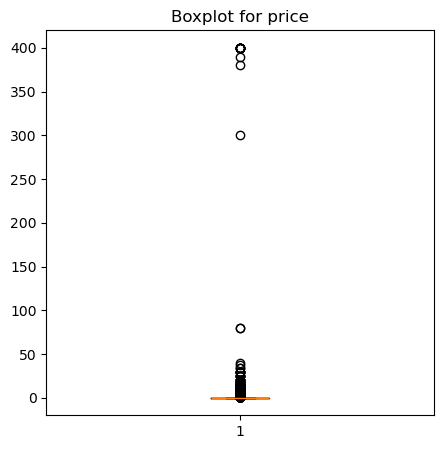

In [124]:
plt.figure(figsize=[5,5])
plt.boxplot(df1.Price)
plt.title("Boxplot for price")
plt.show()

### checking out the records with price more than 200

In [127]:
df1[df1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [129]:
df1=df1[df1.Price< 200]

In [131]:
df1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

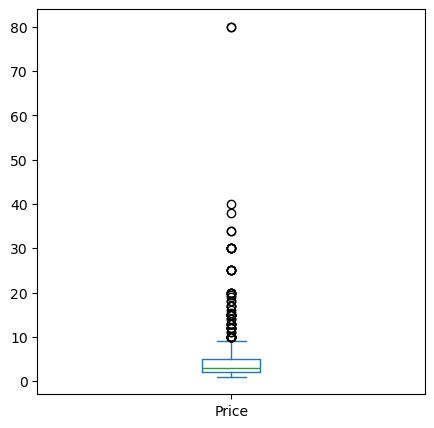

In [135]:
plt.figure(figsize=[5,5])
df1[df1.Price> 0].Price.plot.box()
plt.show()

In [137]:
df1[df1.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100.0,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000.0,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [139]:

df1= df1[df1.Price< 30]
df1.shape

(9338, 13)

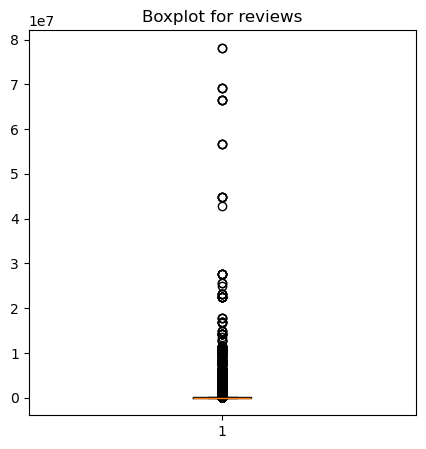

In [141]:
plt.figure(figsize=[5,5])
plt.boxplot(df1.Reviews)
plt.title("Boxplot for reviews")
plt.show()

In [143]:
df1[df1.Reviews > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,5.000000e+08,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,1.000000e+08,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,5.000000e+08,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,1.000000e+08,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,1.000000e+08,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


### dropping records having more than 1 m reviews

In [146]:
df1 = df1[df1.Reviews<= 1000000]
df1.shape

(8634, 13)

In [150]:
df1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [280]:
#This revealed that lots of pre-installed and superstar apps are present in the data. 
#These apps won’t be useful for our analysis since they already have skewed statistics (an extremely high number of installs and reviews),
#which is not common for a majority of the rest of the apps.
#Hence, you took a qualifier of 1 million reviews and removed all the apps having more reviews.

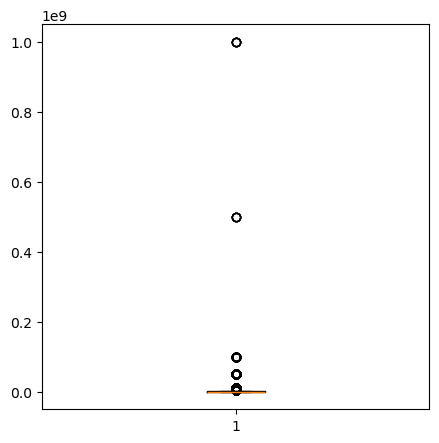

In [282]:
plt.figure(figsize=[5,5])
plt.boxplot(df1.Installs)
plt.show()

In [284]:
df1[df1.Installs >= 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,Updated_Month
3093,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,21516.529524,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,M,8
3139,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,M,8
3166,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,M,8
3215,Google News,NEWS_AND_MAGAZINES,3.9,877643,13000.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,M,8
7905,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,M,8


In [286]:
df1= df1[df1.Installs <= 1000000000]

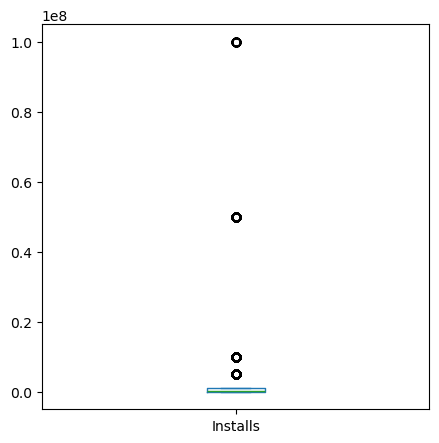

In [288]:
plt.figure(figsize=[5,5])
df1[df1.Installs <= 100000000].Installs.plot.box()
plt.show()

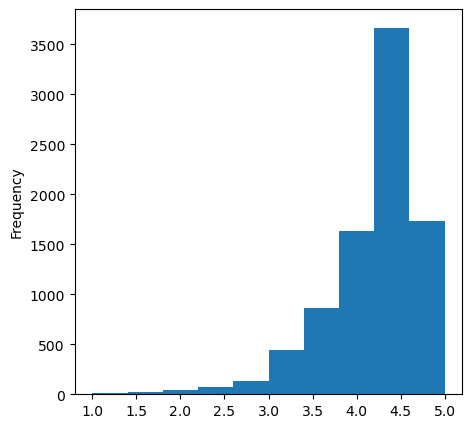

In [294]:
plt.figure(figsize=[5,5])
df1.Rating.plot.hist()
plt.show()
#first plottting histogram 

In [275]:
# now using seaborn
import seaborn as sns

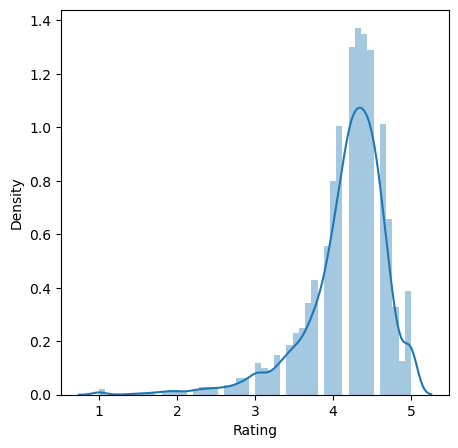

In [298]:
#A probability distribution plot which is a combination of a histogram and a kernel density estimate. This gives a smoother representation of the data.
plt.figure(figsize=[5,5])
sns.distplot(df1.Rating)
plt.show()   # instead of frequency we have density on y-axis

### histogram with limited number of bins---20

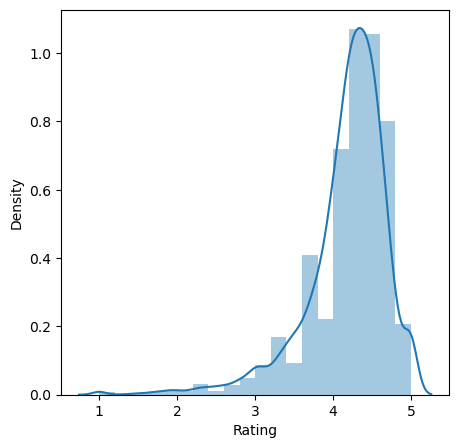

In [300]:
plt.figure(figsize=[5,5])
sns.distplot(df1.Rating, bins=20)
plt.show() 

### changing th color of the plot

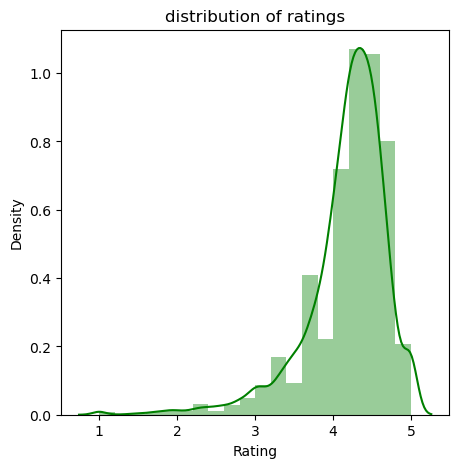

In [304]:
plt.figure(figsize=[5,5])
sns.distplot(df1.Rating, bins=20, color ='g')
plt.title("distribution of ratings", fontsize=12)
plt.show() 

### use different styles

In [307]:
?sns.set_style

Signature: sns.set_style(style=None, rc=None)
Docstring:
Set the parameters that control the general style of the plots.

The style parameters control properties like the color of the background and
whether a grid is enabled by default. This is accomplished using the
matplotlib rcParams system.

The options are illustrated in the
:doc:`aesthetics tutorial <../tutorial/aesthetics>`.

See :func:`axes_style` to get the parameter values.

Parameters
----------
style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
    A dictionary of parameters or the name of a preconfigured style.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    style dictionaries. This only updates parameters that are
    considered part of the style definition.

Examples
--------

.. include:: ../docstrings/set_style.rst
File:      c:\users\kamakshi\anaconda3\lib\site-packages\seaborn\rcmod.py
Type:      function

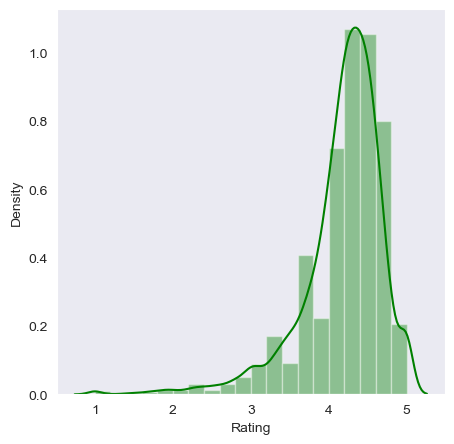

In [309]:
plt.figure(figsize=[5,5])
sns.set_style("dark")
sns.distplot(df1.Rating, bins=20, color ='g')
plt.show() 

### matplotlib themes/styles

In [312]:
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [314]:
plt.style.use("ggplot")

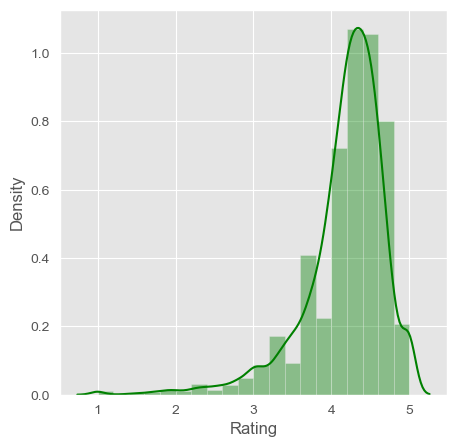

In [316]:
plt.figure(figsize=[5,5])
sns.distplot(df1.Rating, bins=20, color ='g')
plt.show()

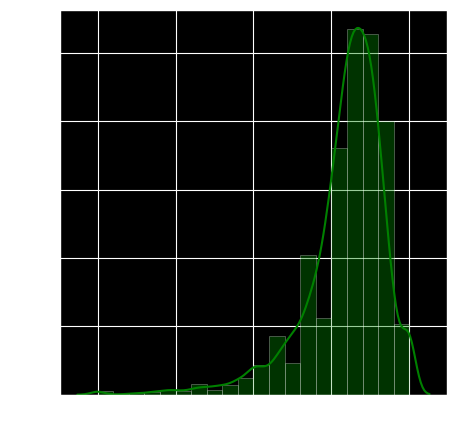

In [318]:
plt.figure(figsize=[5,5])
plt.style.use("dark_background")
sns.distplot(df1.Rating, bins=20, color ='g')
plt.show()

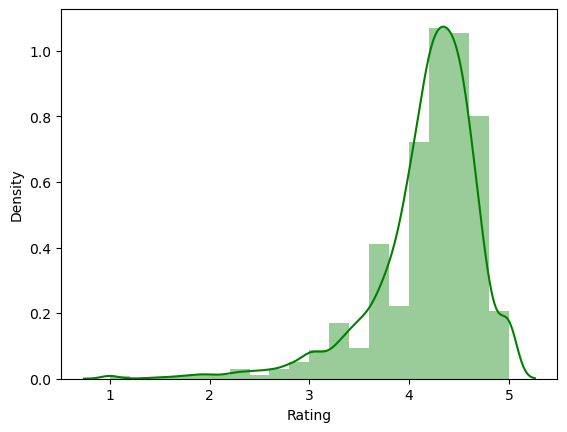

In [192]:
plt.style.use("default")
sns.distplot(df1.Rating, bins=20, color ='g')
plt.show()  #back to where we were without any particular style option

In [194]:
#in the case of categorical variables, you need to use aggregates or measures like sum, average and median to plot the visualisations. 
#And then use plots like a bar chart or pie chart to portray those relationships. 

### analyse categorical columns

In [197]:
df1['Content Rating'].value_counts()

Content Rating
Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [199]:
# last two only have a total of four so these two would not be appropriate to analyse as we cannot say something about 3 and 1
#therefore we should drop these

### dropping records for adults only 18+ and unrated

In [202]:
df1 = df1[~df1['Content Rating'].isin (["Adults only 18+" ,"Unrated"])]

In [204]:
df1.shape

(8630, 13)

In [206]:
df1.reset_index(inplace = True, drop = True)

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8630 non-null   object 
 1   Category        8630 non-null   object 
 2   Rating          8630 non-null   float64
 3   Reviews         8630 non-null   int32  
 4   Size            8630 non-null   float64
 5   Installs        8630 non-null   float64
 6   Type            8630 non-null   object 
 7   Price           8630 non-null   float64
 8   Content Rating  8630 non-null   object 
 9   Genres          8630 non-null   object 
 10  Last Updated    8630 non-null   object 
 11  Current Ver     8630 non-null   object 
 12  Android Ver     8630 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 842.9+ KB


In [210]:
df1['Content Rating'].value_counts()

Content Rating
Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: count, dtype: int64

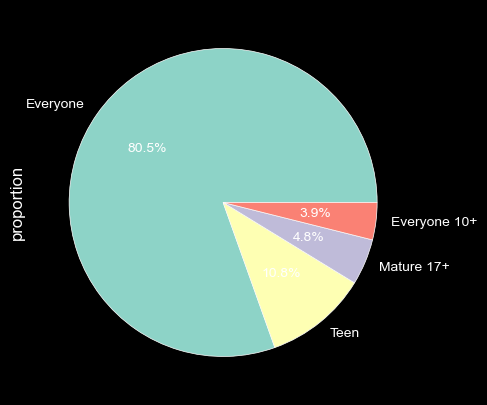

In [322]:
plt.figure(figsize=[5,5])
df1['Content Rating'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

In [330]:
#### Most of the apps are for everyone.

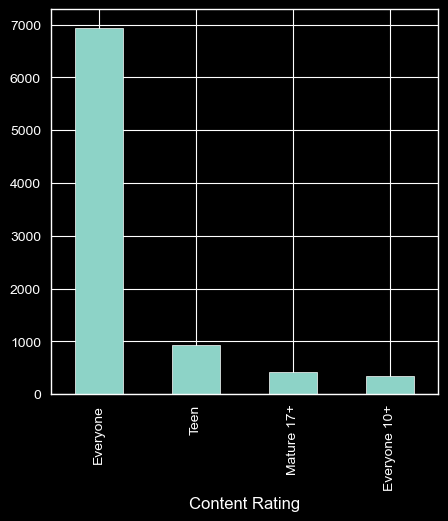

In [324]:
plt.figure(figsize=[5,5])
df1['Content Rating'].value_counts().plot.bar()  #for horizontal bar graph use plot.barh
plt.show()

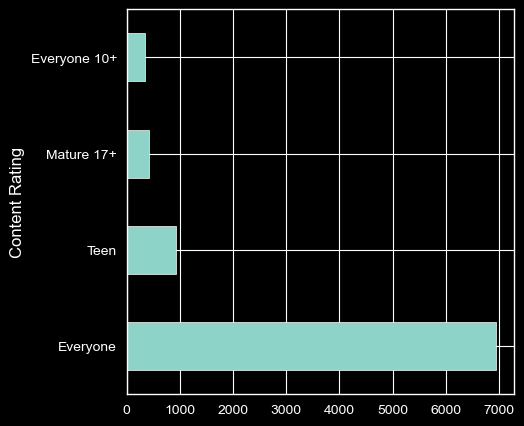

In [326]:
plt.figure(figsize=[5,5])
df1['Content Rating'].value_counts().plot.barh()  #for horizontal bar graph use plot.barh
plt.show()

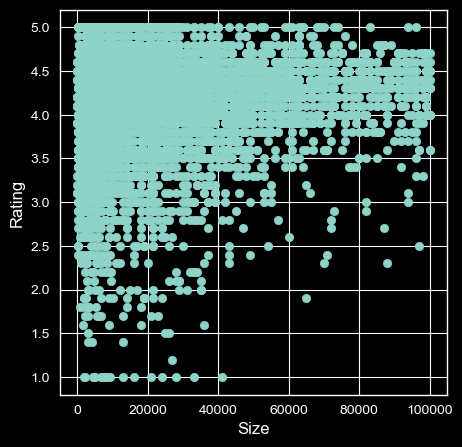

In [332]:
plt.figure(figsize=[5,5])
plt.scatter(df1.Size, df1.Rating)
plt.xlabel("Size")
plt.ylabel("Rating")
plt.show()  #using matplotlib plotting scatter plot


In [334]:
#### The apps which have less size are given more ratings.

<Figure size 500x500 with 0 Axes>

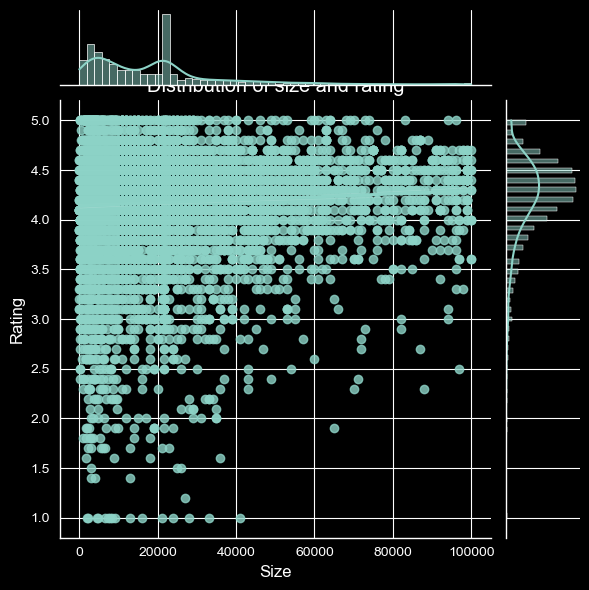

In [336]:
plt.figure(figsize=[5,5])
sns.jointplot(data=df1, x= "Size" , y= "Rating", kind='reg')
plt.title("Distribution of size and rating")
plt.show()

### ratings vs price

<Figure size 500x500 with 0 Axes>

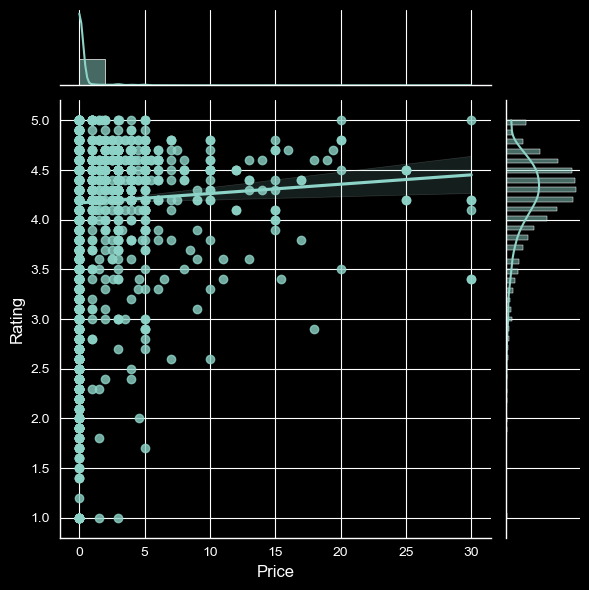

In [338]:
plt.figure(figsize=[5,5])
sns.jointplot(data=df1, x= "Price" , y= "Rating" , kind ='reg')
plt.show()

In [340]:
#Now, in case there are 4-5 numeric variables that you want to analyse, making a jointplot for every 2 numeric variables is a bit tedious.
#To overcome this limitation, let’s learn another functionality, the pair plots.

### looking at all numeric columns together---pairplot

<Figure size 500x500 with 0 Axes>

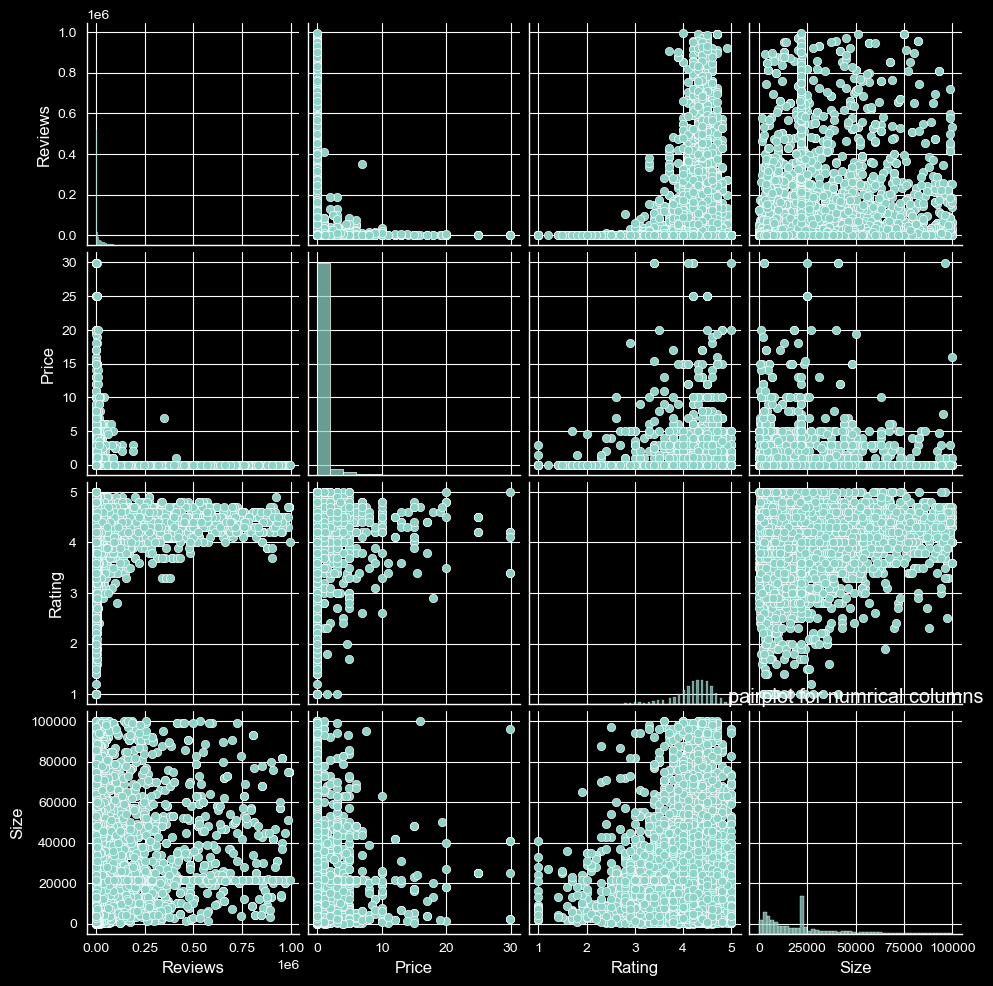

In [344]:
plt.figure(figsize=[5,5])
sns.pairplot(df1[['Reviews', 'Price', 'Rating','Size']])
plt.title("pairplot for numrical columns")
plt.show()

* It can be seen that for every two numeric variables, the pairplot creates a scatter-plot 
* whereas in the case for the diagonal ones, where the same variable is being considered twice, a histogram is shown. 

##### CONCLUSION
* As prices increases, the reviews and ratings decreases.
* The more the ratings, the more the reviews.

### Numerical vs Categorical 

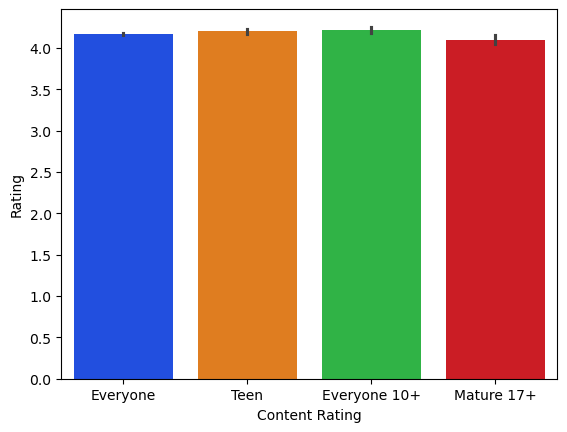

In [231]:
sns.barplot(data=df1, x="Content Rating", y= "Rating", color="orange", palette= "bright")
plt.show()

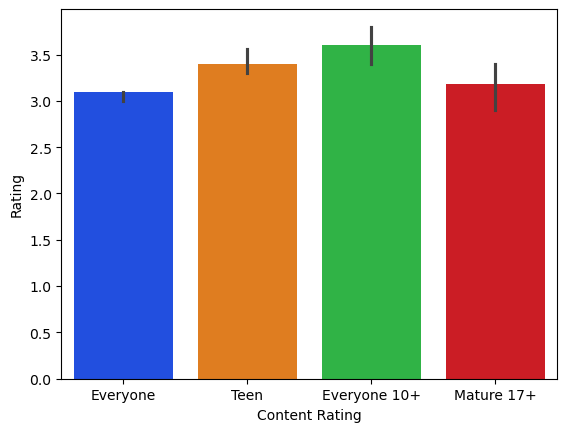

In [232]:
sns.barplot(data= df1, x="Content Rating", y= "Rating" ,palette ="bright",estimator = lambda x:np.quantile(x,0.05))
plt.show()

###  box plot of rating for each category

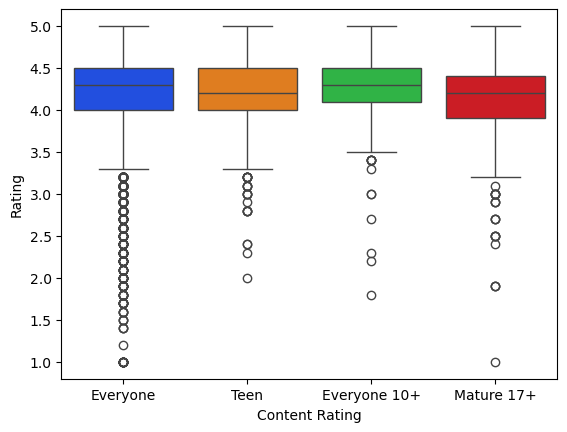

In [236]:
sns.boxplot(data = df1, x="Content Rating", y = "Rating", palette = "bright")
plt.show()

In [237]:
### the interaction of more than two variables --- 3 things at a time -- heatmap

### heatmap

In [239]:
##rating vs size vs content rating



In [240]:
?pd.qcut

Signature:
pd.qcut(
    x,
    q,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    duplicates: 'str' = 'raise',
)
Docstring:
Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based
on sample quantiles. For example 1000 values for 10 quantiles would
produce a Categorical object indicating quantile membership for each data point.

Parameters
----------
x : 1d ndarray or Series
q : int or list-like of float
    Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
    array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
labels : array or False, default None
    Used as labels for the resulting bins. Must be of the same length as
    the resulting bins. If False, return only integer indicators of the
    bins. If True, raises an error.
retbins : bool, optional
    Whether to return the (bins, labels) or not. Can be useful if bins
    is given as a scalar.
precision : int, optional
    

In [241]:
## coverting size to categorical using qcut
df1["Size_Bucket"]= pd.qcut(df1.Size, [0,0.2,0.4,0.6,0.8,1] ,["VL","L","M","H","VH"])
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [242]:
pd.pivot_table(data = df1, index= "Content Rating", columns= "Size_Bucket", values= "Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215699,4.170799,4.187396
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.138408,4.198131,4.246154


In [243]:
pd.pivot_table(data = df1, index= "Content Rating", columns= "Size_Bucket", values= "Rating", aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [353]:
inp=pd.pivot_table(data = df1, index= "Content Rating", columns= "Size_Bucket", values= "Rating", aggfunc= lambda x: np.quantile(x,0.2))
inp

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


##### CONCLUSION:
* Everyone: Consistent ratings across all size buckets, mostly around 3.8-4.0.
* Everyone 10+: Slightly higher ratings than "Everyone", especially in "M" to "VH" buckets (3.92 to 4.0).
* Mature 17+: Lowest ratings in the "VL" and "L" buckets (3.30 to 3.7), but improves as size increases.
* Teen: Ratings are fairly consistent (3.8 to 4.0), with no significant change across buckets.

<Axes: xlabel='Size_Bucket', ylabel='Content Rating'>

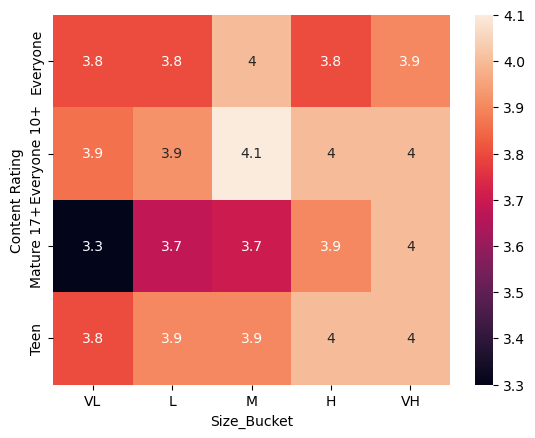

In [245]:
sns.heatmap(inp,annot= True)  #annot appears the values

### analyse the ratings by month

In [247]:
df1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs           float64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [248]:
df1["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [249]:
df1["Updated_Month"]= pd.to_datetime(df1["Last Updated"]).dt.month  #this will first chane it into date time and extract month from it

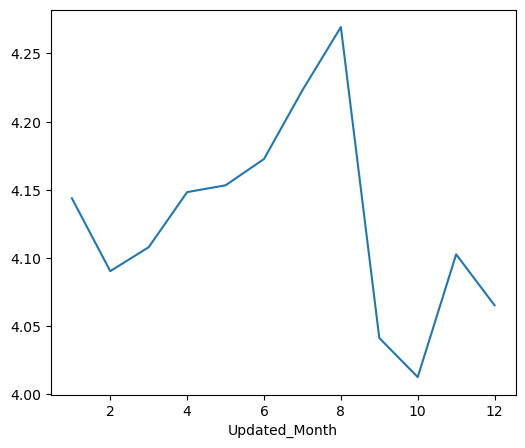

In [253]:
plt.figure(figsize=[6,5])
df1.groupby(["Updated_Month"])['Rating'].mean().plot() #found the average rating for each month using a groupby.
plt.show()

In [255]:
sf = pd.pivot_table(data= df1, values= "Installs", index= "Updated_Month", columns = "Content Rating", aggfunc=sum)
sf

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_Month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,2.361068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,8.271110e+09,456556000.0,419491910.0,1.943557e+09
8,7.430943e+09,215821000.0,312981700.0,6.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


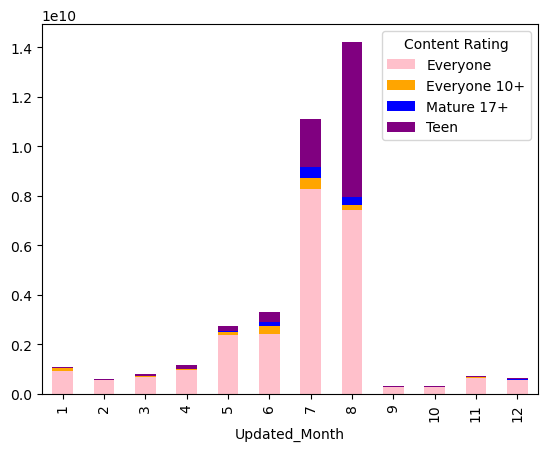

In [257]:
sf.plot(kind= "bar", stacked= True, color=["pink", "orange", "blue","purple"])
plt.show() #Stacked bar pot helps to comapre multiple categories

##### Inferences:
* The Updated_Month values show higher numbers for Everyone and Teen compared to Mature 17+ and Everyone 10+ across the months.
* Everyone and Teen generally have higher values, especially in months 7 and 8.
* Everyone has consistently high numbers, with a notable peak in month 7 (8.27 billion).
* Teen values are particularly high in month 8 (6.26 billion), showing a significant surge.
* Mature 17+ and Everyone 10+ have much smaller values, peaking in month 6, with values around 145 million and 317 million, respectively.
* Month 7 stands out for Everyone and Teen, both showing exceptionally high values compared to the other months.